# 5. The Langmuir isotherm

The Langmuir isotherm provides a relationship between the compositions of the fluid phase and of the adsorbed phase at equilibrium.

In the following we shall note with $C$ the concentration of the component that undergoes adsorption in the fluid phase, and with $q$ its  molar fraction in the adsorbed phase. 

The Langmuir isother is based on a set of assumptions:
- The kinetic constants of the adsorption and the desorption processes, as well as the equilibrium constant for the adsorption process, are independent from the fraction of free adsorption sites.
- Interactions between adsorbed molecules are neglibile, or in other words the adsorption process does not depend on the local environment around an adsorption site.
- The surface of the adsorbent material can host a single monolayer of adsorbed molecules, hence its fraction of free sites $\theta_0$ and the fraction of occupied sites $\Gamma_1$ are related through the stoichiometric relation $\Gamma_0+\Gamma_1=1$.

In order to derive the langmuir adsorption isotherm from this set of hypotheses let's start by defining expressions for the adsorption and desorption rates. 

The adsorption process takes place when a molecule of the component that is undergoing adsorption finds a free adsorption site. The rate of an adsorption event can thus be considered analogous to a bimolecular elementary reaction step with rate:

$$
R_A=k_A\Gamma_0{C}
$$(eq1)

Where $k_A$ is the kinetic constant, $\Gamma_0$ is the fraction of free adsorption sites,  and $x$ is the molar fraction of the adsorbing component in the fluid phase.

The rate of desorption instead can be considered analogous to a monomolecular reaction, in which a (non-covalent) bond is broken and an adsorbed molecule is released to the fluid phase, leaving one free site. Its rate can be written as: 

$$
R_D=k_D\Gamma_1
$$(eq2)

At equilibrium, the rates of adsorption and desorption are equal and the net flux of molecules to and from the adsorbed phase is null. 
We can thus write: 

$$
k_A\Gamma_0{C}=k_D\Gamma_1
$$(eq3)

Recalling the stoichiometric relation between the fraction of accupied and free sites Eq. \eqref{eq:3} becomes: 

$$
k_A(1-\Gamma_1){C}=k_D\Gamma_1
$$(eq4)

which can be rearranged to provide an explicit expression of $\Gamma_1$, the fraction of accupied sites, as a function of the concentration $C$ in the fluid phase: 

$$
\Gamma_1=\frac{k_A{C}}{k_D+k_A{C}}
$$(eq5)

To obtain a typical expression of the Langmuir isotherm we shall introduce as a single parameter for this equation the adsorption equilibrium constant $B_0=k_A/k_D$: 

$$
\Gamma_1=\frac{B_0{C}}{1+B_0{C}}
$$(eq6)


## 5.1 Isotherm dependence on $B_0$

In order to understand the role of the adsorption equilibrium constant let us plot the fraction of occupied adsorption sites as a function of $B_0$

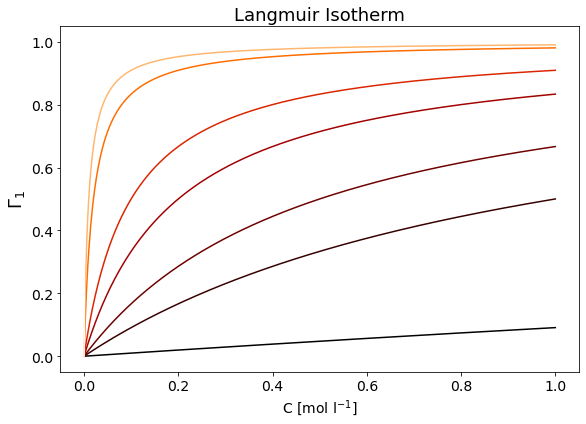

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# molar fraction in the feed
z = 0.3
N = 500 #number of points
C = np.linspace(0, 1, N)
B0 = np.array([0.1, 1, 2, 5, 10, 50, 100, 1000]);

color=iter(cm.gist_heat(np.linspace(0,1,np.size(B0))))

for i in range(0,np.size(B0)):     
    c=next(color)
    #Langmuir isotherm
    Gamma1 = B0[i]*C / (1 + B0[i]*C) 
    axes.plot(C,Gamma1, marker=' ' , c=c)

    
plt.title('Langmuir Isotherm', fontsize=18);
axes.set_xlabel('C [mol l$^{-1}$]', fontsize=14);
axes.set_ylabel('$\Gamma_1$',fontsize=18);

## 5.2 Concentration in the adsorbed phase.

The Langmuir isotherm as discussed so far provides a relationship between the fractional occupation of adsorption sites $\Gamma_1$ and the concentration in the fluid phase $C$. This relationship is only dependent on the thermodynamics of adsorption, captured by the value of the adsorption equilibrium coinstant $B_0$. In order to compute the concentration adsorbed by a specific material we need one additional parameter, the maximum concentration $q_M$ in the adsorbed phase. 
The concentration in the adsorbed phase is thus computed as: $q=\Gamma_1{q_M}$, hence: 

$$
q=q_M\frac{B_0{C}}{1+B_0{C}}
$$(eq7)

The parameter $q_M$ depends on the adsorbent material, and in particular on the amount of surface area per unit volume. 

In the following we report the concentration in the adsorbed phase, in equilibrium with an arbitrary concetration $C'$ in the fluid phase as a function of the affinity towards the stationary phase (captured by parameter $B_0$) and of its surface area (captured by parameter $q_M$). 


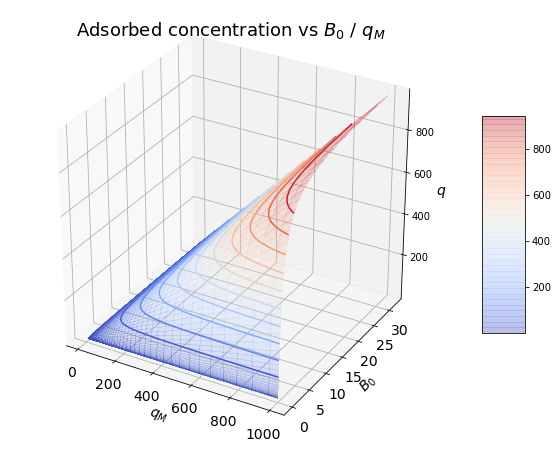

In [4]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

# Parameters: 
# molar fraction in the feed
N = 100 #number of points
B0 = np.logspace(-3, 1.5, N)
q_M = np.logspace(1, 3, N)
C = 1 ; # arbitrary value of C'
B0, q_M = np.meshgrid(B0, q_M) 

q=q_M * B0 * C / (1+B0 * C)


#Plotting

figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d') 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


surf=axes.plot_surface(q_M,B0,q,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.2)

contour=axes.contour(q_M,B0,q,np.linspace(100, 800, 10),cmap=cm.coolwarm)

plt.title('Adsorbed concentration vs $B_0$ / $q_M$', fontsize=18);
axes.set_xlabel('$q_M$', fontsize=14);
axes.set_ylabel('$B_0$',fontsize=14);
axes.set_zlabel('$q$',fontsize=14);
figure.colorbar(surf, shrink=0.5, aspect=5);

## 5.3 Langmuir isotherm in the gas phase, and in multicomponent systems. 

When describing the thermodynamics of adsorption from the gas phase it is convenient to introduce explicitly the pressure $P$ in the Langmuir isotherm. 
In this case the expression of the monocomponent Langmuir isotherm becomes: 

$$
q=q_M\frac{B_1{P}}{1+B_1{P}}
$$(eq8)

where $B_1=B_0/RT$ and $P$ is pressure.

In multicomponent systems, where more than one component is competing for the same adsorption sites, the Langmuir isotherm for component $i$ can be written as: 

$$
q_i=q_M\frac{B_{1,i}{P_i}}{1+B_{1,i}{P_i}}
$$(eq9)

where $P_i$ is the partial pressure component i in the gas phase, and $B_{1,i}=B_{0,i}/RT$ where $B_{0,i}$ is the adsorption equilibrium constant for component $i$. 

In the following we report the competitive adsorption isotherms of two components adsorbing from a binary mixture.

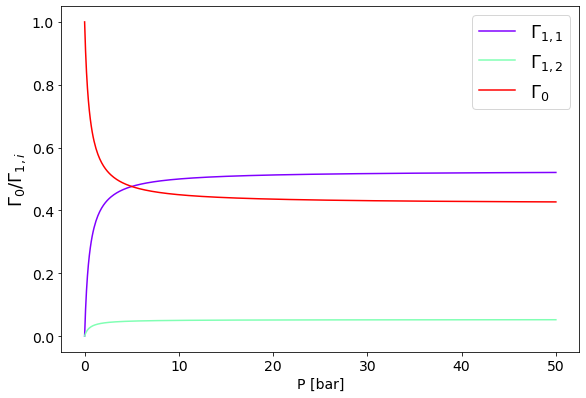

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# molar fraction in the feed
z = 0.3
N = 500 #number of points
P = np.linspace(0,50, N)
y = 0.1 #component 1 is in a smaller proportion
B11 = 10; #component 1 affinity for the stationary phase is higher than that of component 2
B12 = 1;

color=iter(cm.rainbow(np.linspace(0,1,3)))
c=next(color)
Gamma11 = B11*P*y / (1 + B11*P*y + B12*P*(1-y)) 
axes.plot(P,Gamma11, marker=' ' , c=c)
c=next(color)
Gamma12 = B12*P*y / (1 + B11*P*y + B12*P*(1-y)) 
axes.plot(P,Gamma12, marker=' ' , c=c)
c=next(color)
Gamma0 = 1 -  Gamma11 - Gamma12
axes.plot(P,Gamma0, marker=' ' , c=c)

axes.set_xlabel('P [bar]', fontsize=14);
axes.set_ylabel('$\Gamma_0 / \Gamma_{1,i}$', fontsize=18);
axes.legend(['$\Gamma_{1,1}$','$\Gamma_{1,2}$','$\Gamma_{0}$'], fontsize=18);